# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Background:  There are many factors that influences the used car price.  We need to provide the insights to the group of used car dealerships
on what drives the used car price so they can strategize their inventory and business.

Business Objectives: Identify top factors that drives used car price.

Business Success Criteria:  
Identify the ideal regression model to run on test data and confirm the predictions are as expected with least error.

Inventory of Resources, Tools and Techniques: 
Used car dataset - Vehicles.csv.
Regression models - Linear regression model, Ridge regression model, Lasso regression model,
Cross validation techiniques - CV, Grid Search CV
Error metrics - 


Data task:  This will be worked below as supervised machine learining problem.  Using the Vehicles.csv data, the goal is to use multiple regression models to predict the factors that drives the used car price.  In the dataset provided we will use price coloumn as dependent variable and other coloumns contibuiting to the price of car as independent variables.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Used car data - Vehicles.csv.   Following Data features from Vehicles seems important to analyze price estimation - Price, Year, 
Manufacturer, Model, condition, Odometer, Cylinders, fuel, size, type, paint color, state, drive.  Detailed investigation/analysis of the dataset follows.


In [1995]:
# Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sklearn.set_config(transform_output='pandas')
import category_encoders as ce
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
import plotly.express as px
import random

In [1996]:
# Load the dataset into a dataframe and look at the first few rows.
vehicles = pd.read_csv('data/vehicles.csv')
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [1997]:
# Look at the few last rows of the dataset.
vehicles.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [1998]:
# Look at the shape of the dataset.
vehicles.shape

(426880, 18)

In [1999]:
# Call describe on the dataset to understand various values associated with the data.
vehicles.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [2000]:
# Get more information on the dataset
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [2001]:
# Look at which features has zero values and percentage for each feature.
vehicles.eq(0).sum()/426880 * 100

id              0.000000
region          0.000000
price           7.705913
year            0.000000
manufacturer    0.000000
model           0.000000
condition       0.000000
cylinders       0.000000
fuel            0.000000
odometer        0.460317
title_status    0.000000
transmission    0.000000
VIN             0.000000
drive           0.000000
size            0.000000
type            0.000000
paint_color     0.000000
state           0.000000
dtype: float64

In [2002]:
# Look at which features has missing values and percentage for each feature.
vehicles.isna().sum()/426880 * 100

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

In [2003]:
# Look at each feature's unique value count
vehicles.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

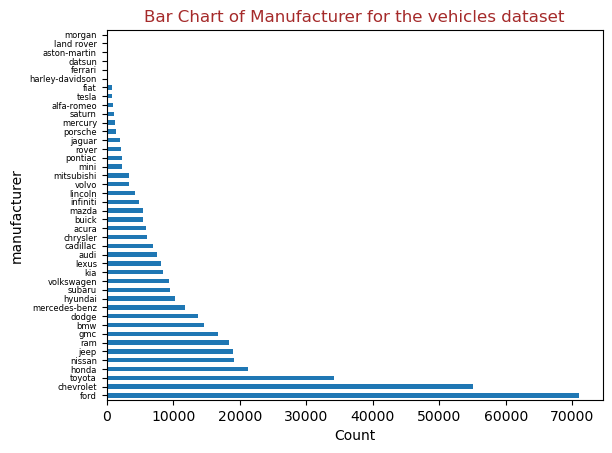

In [2004]:
# Visulalize Manufacturer distribution for the vehicles dataset
plot_manufacturer = vehicles['manufacturer'].value_counts()
plot_manufacturer.plot(kind='barh')
plt.title('Bar Chart of Manufacturer for the vehicles dataset',color='Brown')
plt.xlabel('Count')
plt.tick_params(axis='y', labelsize=6)
plt.show()

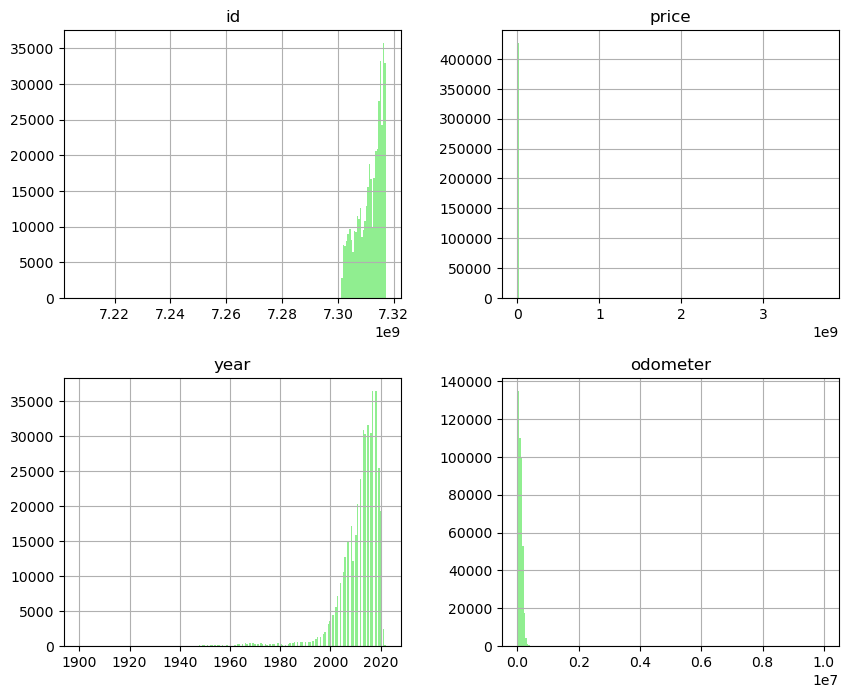

In [2005]:
# Pick numeric features
vehicles_numeric = vehicles.select_dtypes(include = ['float64','int64'])

# Plot Histogram for numeric variables and observe the trends
vehicles_numeric.hist(bins = 200, figsize=(10,8),color = 'lightgreen' )
plt.show()

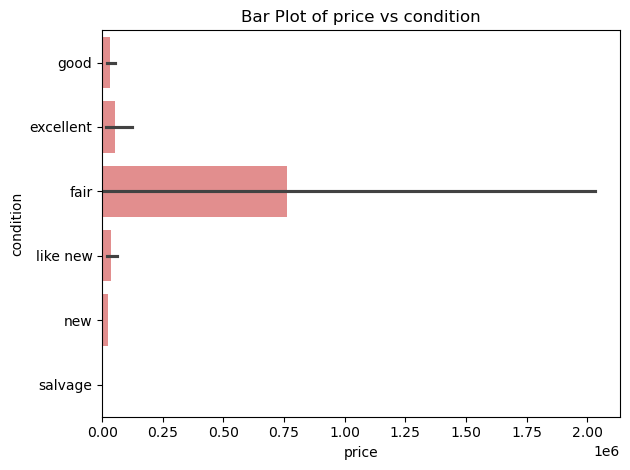

In [2006]:
# Bar plot for price vs condition 
sns.barplot(x='price', y='condition', data=vehicles,color='lightcoral')
plt.title('Bar Plot of price vs condition')
plt.tight_layout()
plt.show()

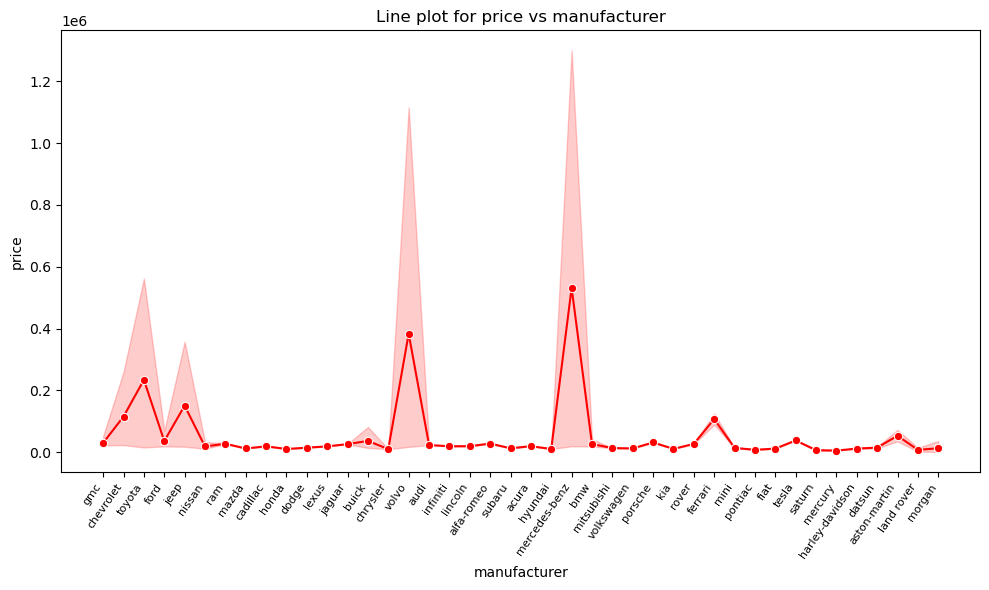

In [2007]:
# Line plot for price vs manufacturer
fig, ax = plt.subplots(figsize=(10, 6))
    
# Create the line plot on the axes
sns.lineplot(x='manufacturer', y='price', marker='o', color='red', data=vehicles, ax=ax)
plt.title('Line plot for price vs manufacturer')
plt.xticks(rotation=55, ha='right',fontsize=8)
plt.tight_layout()
    
# Show the plot
plt.show()


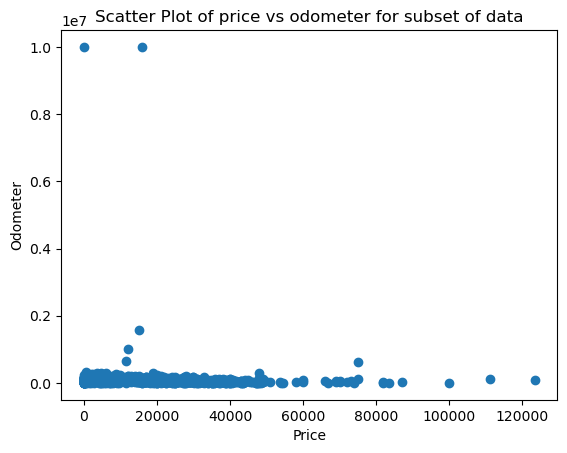

In [2008]:
# Scatter Plot of price vs odometer for subset of data
sample_size = 1000 
sampled_indices = random.sample(range(len(vehicles)), sample_size)
df_sampled = vehicles.iloc[sampled_indices]
plt.scatter(df_sampled['price'], df_sampled['odometer'])
plt.xlabel('Price')
plt.ylabel('Odometer')
plt.title('Scatter Plot of price vs odometer for subset of data')
plt.show()

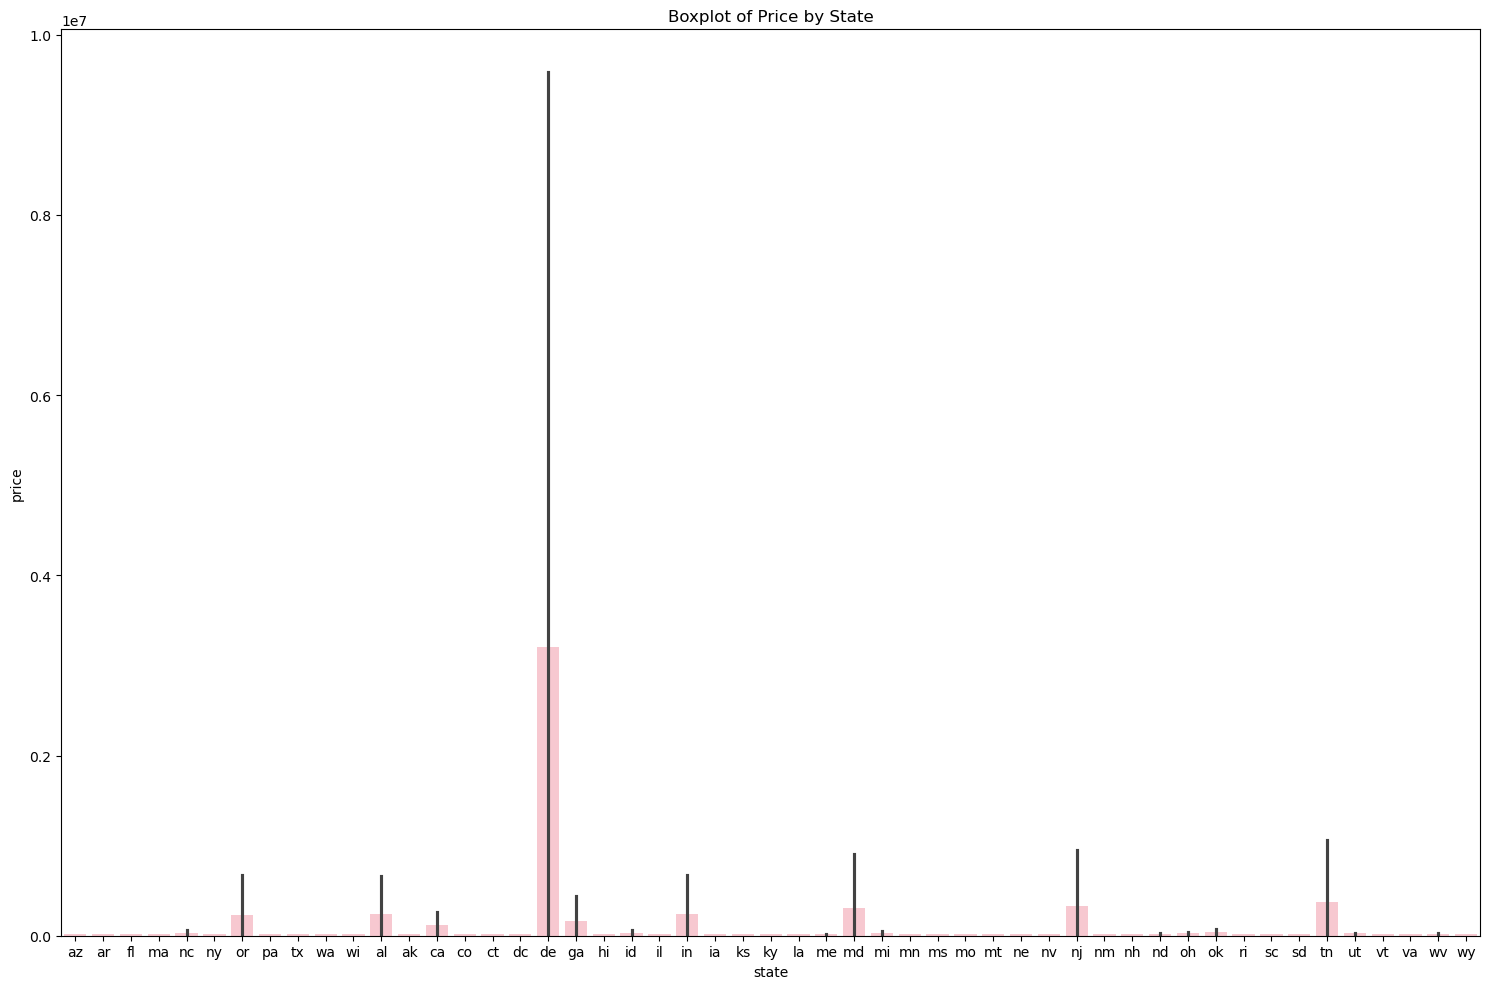

In [2009]:
fig, ax = plt.subplots(figsize=(15, 10))

# Boxplot
sns.barplot(x='state', y='price', data=vehicles,color = 'pink', ax=ax)
plt.title('Boxplot of Price by State')
plt.tight_layout()
plt.show()


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

| Feature | Status | Cleaning action |
| --- | --- | --- |
| id | Good | id is not factoring for price hence can be dropped
| region | Good | None
| price | 7.705913 % zero values | replace with median of price, replace price outlier values using IQR
| year | 0.282281 % missing values | replace missing values with mode and convert to integer
| manufacturer | 4.133714 % missing values | fill with missing
| model | 1.236179 % missing values | drop rows with missing values
| condition | 40.785232 % missing values | replace missing values with mode
| cylinders | 41.622470 % missing values | replace missing values with mode
fuel | 0.705819 % missing values | fill with missing
odometer | 1.030735 % missing values | replace missing values with mean
title_status | 1.930753 % missing values | replace missing values with mode
transmission | 0.598763 % missing values | fill with missing
VIN | 37.725356 % missing values | VIN does not provide any direct insight into deriving the price hence can be dropped.
drive | 30.586347 % missing values | fill with missing
size | 71.767476  % non-null  object | size has over 71% missing values hence can be dropped
type | 21.752717 % missing values | fill with missing
paint_color | 30.501078 % missing values | replace missing values with mode
state | Good |  None

In [2012]:
# copy the vehicles dataframe before making changes for data cleaning.
original_vehicles_df = vehicles.copy()

In [2013]:
# id is not factoring for price and can be dropped.
# size has over 71% missing values and can be dropped.
# VIN does not provide and direct insight into deriving the price so it can be dropped.
vehicles.drop(columns = ['id','VIN','size'], inplace = True)

# verify that the coloumns count is now dropped from 18 to 15.
vehicles.shape

(426880, 15)

In [2014]:
# odometer feature has 1.030735 % missing values.  Use simple imputer to address that
odo_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
odo_imputer.fit(vehicles[['odometer']])
odo_imputed = odo_imputer.transform(vehicles[['odometer']])

# Replace the imputed values for odometer feature in to the original vehicles data frame
vehicles['odometer'] = odo_imputed['odometer']

# Check that odometer feature has no more missing values.
vehicles.odometer.isna().sum()

0

In [2015]:
# create imputer to use to replace missing values with most_frequent value for features listed below. 
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Impute values for 'year','title_status','paint_color','condition','cylinders' features to repalce with most_frequent value
mode_imputer.fit(vehicles[['year','title_status','paint_color','condition','cylinders']])

# Replace the imputed values into the original vehicles data frame
vehicles[['year','title_status','paint_color','condition','cylinders']] = mode_imputer.transform(vehicles[['year','title_status','paint_color','condition','cylinders']])

# Convert year datatype from float to integer
vehicles['year'] = vehicles['year'].astype(int)

# Check no nore missing values for the imputed features
vehicles[['year','title_status','paint_color','condition','cylinders']].isna().sum()/ 426880*100



year            0.0
title_status    0.0
paint_color     0.0
condition       0.0
cylinders       0.0
dtype: float64

In [2016]:
# manufacturer has 4.133714 % missing values  - fill with missing
# fuel has 0.705819 % missing values          - fill with missing
# transmission has 0.598763 % missing values  - fill with missing
# drive has 30.586347 % missing values        - fill with missing
# type has 21.752717 % missing values         - fill with missing

# replace missing values with value 'missing'
vehicles[['manufacturer','fuel','transmission','drive','type']] = vehicles[['manufacturer','fuel','transmission','drive','type']].fillna('missing')

# check that there are no more missing values for the features listed
vehicles[['manufacturer','fuel','transmission','drive','type']].isna().sum()/ 426880*100


manufacturer    0.0
fuel            0.0
transmission    0.0
drive           0.0
type            0.0
dtype: float64

In [2017]:
# keep track of dataset shape whiile cleanup and transformation of data
vehicles.shape

(426880, 15)

In [2018]:
# model has 1.236179 % missing values - drop rows with missing values
vehicles.dropna(subset=['model'], inplace=True)

# Check the changed shape of the database after dropping the rows
vehicles.shape

(421603, 15)

In [2019]:
# price feature has 7.705913 % zero values - replace with median of price
median_imputer = SimpleImputer(missing_values=0, strategy='median')
median_imputer.fit(vehicles[['price']])
price_imputed = median_imputer.transform(vehicles[['price']])
vehicles['price']= price_imputed['price']

# replace price outlier values using IQR
Q1 = vehicles['price'].quantile(0.25)
Q3 = vehicles['price'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

price_outlier_values = vehicles[vehicles['price'] > upper_bound]

vehicles = vehicles[(vehicles['price'] >= lower_bound) & (vehicles['price'] <= upper_bound)]
vehicles.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590.0,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,missing,pickup,white,al
28,auburn,22590.0,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,missing,pickup,blue,al
29,auburn,39590.0,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,missing,pickup,red,al
30,auburn,30990.0,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,missing,pickup,red,al
31,auburn,15000.0,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Build a Linear regression model based on 1 numeric feature - year

In [2022]:
# Build a model based on 1 numeric feature - year
lr_1_feature = LinearRegression(fit_intercept=False).fit(vehicles[['year']], vehicles['price'])
print(lr_1_feature)

LinearRegression(fit_intercept=False)


In [2023]:
# Calcualte error matrics for lr_1_feature
pred1 = lr_1_feature.predict(vehicles[['year']])
lr1_mse_1 = mean_squared_error(vehicles['price'], pred1)
lr1_mae_1 = mean_absolute_error(vehicles['price'], pred1)
lr1_rmse_1 = np.sqrt(MSE_1)
print('Linear regression with 1 feature')
print('-' * 50)
print(f'Mean Squared Error      : {lr1_mse_1}')
print(f'Root Mean Squared Error : {lr1_rmse_1}')
print(f'Mean Absolute Error     : {lr1_mae_1}')

Linear regression with 1 feature
--------------------------------------------------
Mean Squared Error      : 143609497.15482497
Root Mean Squared Error : 11983.718002140446
Mean Absolute Error     : 9748.367537669332


### Build a Linear regression model based on 2 numeric features - year and odometer

In [2025]:
# Build a model based on 2 numeric features - year and odometer
lr_2_feature = LinearRegression(fit_intercept=False).fit(vehicles[['year','odometer']], vehicles['price'])
print(lr_2_feature)

LinearRegression(fit_intercept=False)


In [2026]:
# Calcualte error matrics for lr_2_feature
pred2 = lr_2_feature.predict(vehicles[['year','odometer']])
lr1_mse_2 = mean_squared_error(vehicles['price'], pred2)
lr1_mae_2 = mean_absolute_error(vehicles['price'], pred2)
lr1_rmse_2 = np.sqrt(MSE_1)
print('Linear regression with 2 features')
print('-' * 50)
print(f'Mean Squared Error      : {lr1_mse_2}')
print(f'Root Mean Squared Error : {lr1_rmse_2}')
print(f'Mean Absolute Error     : {lr1_mae_2}')

Linear regression with 2 features
--------------------------------------------------
Mean Squared Error      : 139445932.42509052
Root Mean Squared Error : 11983.718002140446
Mean Absolute Error     : 9521.249814254952


In [2027]:
# copy the vehicles dataframe before making changes to the categorical coloumns.
original_vehicles_df = vehicles.copy()

In [2028]:
# Seperate numeric and categorical features in prepration for running Linear regression on all the features
vehicles_numeric_cols = vehicles.select_dtypes(include = ['float64','int64']).columns
vehicles_categorical_cols  = vehicles.select_dtypes(include = ['object']).columns
print(vehicles_numeric_cols)
print(vehicles_categorical_cols)

Index(['price', 'year', 'odometer'], dtype='object')
Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'type', 'paint_color',
       'state'],
      dtype='object')


In [2029]:
# encode categorical data using JamesSteinEncoder
X = vehicles[vehicles_categorical_cols]
y = vehicles['price']
category_encoder = ce.JamesSteinEncoder(cols=vehicles_categorical_cols)
category_encoder.fit(X,y)
encoded_vehicles_categorical_cols = category_encoder.transform(X)

In [2030]:
# Create dataframe for encoded categorical features
vehicles_encoded = pd.DataFrame(encoded_vehicles_categorical_cols)
vehicles_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411894 entries, 27 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        411894 non-null  float64
 1   manufacturer  411894 non-null  float64
 2   model         411894 non-null  float64
 3   condition     411894 non-null  float64
 4   cylinders     411894 non-null  float64
 5   fuel          411894 non-null  float64
 6   title_status  411894 non-null  float64
 7   transmission  411894 non-null  float64
 8   drive         411894 non-null  float64
 9   type          411894 non-null  float64
 10  paint_color   411894 non-null  float64
 11  state         411894 non-null  float64
dtypes: float64(12)
memory usage: 40.9 MB


In [2031]:
# Drop original categorical coloumns from the dataframe 
vehicles = vehicles.drop(columns=vehicles_categorical_cols,axis=1)
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411894 entries, 27 to 426879
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   price     411894 non-null  float64
 1   year      411894 non-null  int64  
 2   odometer  411894 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 12.6 MB


In [2032]:
# Concate encoded categorical features to the dataframe
vehicles_transformed = pd.concat([vehicles,vehicles_encoded],axis = 1)
vehicles_transformed.head()

,price,year,odometer,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color,state
27,33590.0,2014,57923.0,23441.092232,19444.583410,33876.594323,18373.511187,19627.534152,16542.04855,17551.212327,26278.981824,17348.055945,22472.342094,17573.839146,18849.247471
28,22590.0,2010,71229.0,23441.092232,17780.790359,19706.870038,18373.511187,19627.534152,16542.04855,17551.212327,26278.981824,17348.055945,22472.342094,16714.582611,18849.247471
29,39590.0,2020,19160.0,23441.092232,17780.790359,30371.430528,18373.511187,19627.534152,16542.04855,17551.212327,26278.981824,17348.055945,22472.342094,17870.642787,18849.247471
30,30990.0,2017,41124.0,23441.092232,17006.287558,33620.815148,18373.511187,19627.534152,16542.04855,17551.212327,26278.981824,17348.055945,22472.342094,17870.642787,18849.247471
31,15000.0,2013,128000.0,23441.092232,18090.801793,18644.429983,15241.568921,18033.986774,16542.04855,17551.212327,16032.322995,19185.725852,20177.799320,18874.172398,18849.247471


### Run Linear, Lasso and Ridge regression for the transformed vehicles dataset

In [2034]:
# Test/Train split
X = vehicles_transformed.drop('price', axis = 1)
y = vehicles_transformed['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(type(X_train), type(y_train))

(329515, 14)
(82379, 14)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


### Linear regression with Standard scaler using all features

In [2036]:
# Create LinearRegression model
LinearRegression_pipeline = Pipeline([
        ('scaler', StandardScaler()),
    ('linreg', LinearRegression())
])
# Train LinearRegression model
LinearRegression_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('linreg', LinearRegression())])

In [2037]:
# LinearRegression predict for X_test
lr_pred = LinearRegression_pipeline.predict(X_test)

# calculate root mean squared error
all_lr_mse = mean_squared_error(y_test,lr_pred)
all_lr_rmse = np.sqrt(mse)
all_lr_mae = mean_absolute_error(y_test,lr_pred)
all_lr_r2 = r2_score(y_test,lr_pred)
print('Linear regression with all the features')
print('-' * 85)
print(f'Mean Squared Error      : {all_lr_mse}')
print(f'Root Mean Squared Error : {all_lr_rmse}')
print(f'Mean Absolute Error     : {all_lr_mae}')
print(f'R2 score                : {all_lr_r2}')

Linear regression with all the features
-------------------------------------------------------------------------------------
Mean Squared Error      : 54221725.83385782
Root Mean Squared Error : 7363.539038862554
Mean Absolute Error     : 5189.798384536135
R2 score                : 0.6229863555048014


### Linear regression with Sequential feature selector and standard scaler using all features

In [2039]:
# Linear regression with Sequential feature selector
selector = SequentialFeatureSelector(estimator=LinearRegression(),
                                    n_features_to_select=5,
                                    scoring = 'neg_mean_squared_error')
LinearRegression_pipeline_with_sequential_selector = Pipeline([
        ('scaler', StandardScaler()),
    ('seq_selector',selector),
    ('linreg', LinearRegression())
])

In [2040]:
# Run LinearRegression for the selected features
LinearRegression_pipeline_with_sequential_selector.fit(X_train, y_train)
selectedFeatures_preds = LinearRegression_pipeline_with_sequential_selector.predict(X_test)

# calculate root mean squared error
lr_with_selector_mse = mean_squared_error(y_test,selectedFeatures_preds)
lr_with_selector_rmse = np.sqrt(mse)
lr_with_selector_mae = mean_absolute_error(y_test,selectedFeatures_preds)
lr_with_selector_r2 = r2_score(y_test,selectedFeatures_preds)
print('Linear regression with Sequential Selector')
print('-' * 85)
print(f'Mean Squared Error      : {lr_with_selector_mse}')
print(f'Root Mean Squared Error : {lr_with_selector_rmse}')
print(f'Mean Absolute Error     : {lr_with_selector_mae}')
print(f'R2 score                : {lr_with_selector_r2}')

Linear regression with Sequential Selector
-------------------------------------------------------------------------------------
Mean Squared Error      : 55677373.75216746
Root Mean Squared Error : 7363.539038862554
Mean Absolute Error     : 5230.487089256569
R2 score                : 0.6128649674754835


### Linear regression with the Polynomial features, Standard scaler and Sequential feature selection using all features

In [2042]:
# Run linear regression with the Polynomial features, Standard scaler and Sequential feature selection.
# Create LinearRegression optimal pipeline
LinearRegression_optimal_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 3, include_bias = False)),
    ('selector',SequentialFeatureSelector(estimator=LinearRegression(),
                                    n_features_to_select=5,
                                    scoring = 'neg_mean_squared_error')),
    ('scaler', StandardScaler()),
    ('linreg', LinearRegression())
])
# Train LinearRegression optimal pipeline
LinearRegression_optimal_pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=5,
                                           scoring='neg_mean_squared_error')),
                ('scaler', StandardScaler()), ('linreg', LinearRegression())])

In [2043]:
# LinearRegressionOptimal predict for X_test
lr_pred_optimal = LinearRegression_optimal_pipeline.predict(X_test)

# calculate root mean squared error
optimal_lr_mse = mean_squared_error(y_test,lr_pred_optimal)
optimal_lr_rmse = np.sqrt(mse)
optimal_lr_mae = mean_absolute_error(y_test,lr_pred_optimal)
optimal_lr_r2 = r2_score(y_test,lr_pred_optimal)
print('Linear regression with Plynomial features, Standard Scalar and Sequential Selector')
print('-' * 85)
print(f'Mean Squared Error      : {optimal_lr_mse}')
print(f'Root Mean Squared Error : {optimal_lr_rmse}')
print(f'Mean Absolute Error     : {optimal_lr_mae}')
print(f'R2 score                : {optimal_lr_r2}')

Linear regression with Plynomial features, Standard Scalar and Sequential Selector
-------------------------------------------------------------------------------------
Mean Squared Error      : 48576770.18507959
Root Mean Squared Error : 7363.539038862554
Mean Absolute Error     : 4904.223154723954
R2 score                : 0.6622367716328454


### GridSearchCV with Lasso regression to find optimal alpha

In [2045]:
# Tune the parameters for Lasso regression
param_grid = {
    'lassoreg__alpha': [0.001, 1.0, 10.0, 100.0],
}
Lasso_regression_optimal_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lassoreg', Lasso(random_state = 0))
])

grid_search_lasso = GridSearchCV(Lasso_regression_optimal_pipeline,
                                 param_grid,
                                 scoring='neg_mean_squared_error',
                                 cv=5)
grid_search_lasso.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lassoreg', Lasso(random_state=0))]),
             param_grid={'lassoreg__alpha': [0.001, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

In [2046]:
print(f'Best Alpha for Lasso regression: {grid_search_lasso.best_params_}')

Best Alpha for Lasso regression: {'lassoreg__alpha': 1.0}


### Lasso regression with the best alpha from gird search run above

In [2048]:
# Run Lasso regression with the best alpha from gird search run above.
LassoRegression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lassoreg', Lasso(alpha=1.0))
])

# Train LinearRegression model for luxury car category
LassoRegression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lassoreg', Lasso())])

In [2049]:
# Lasso Regression predict for X_test
lasso_pred = LassoRegression_pipeline.predict(X_test)

# calculate root mean squared error
optimized_lasso_mse = mean_squared_error(y_test,lasso_pred)
optimized_lasso_rmse = np.sqrt(mse)
optimized_lasso_mae = mean_absolute_error(y_test,lasso_pred)
optimized_lasso_r2 = r2_score(y_test,lasso_pred)
print('Lasso regression with best param alpha')
print('-' * 85)
print(f'Mean Squared Error      : {optimized_lasso_mse}')
print(f'Root Mean Squared Error : {optimized_lasso_rmse}')
print(f'Mean Absolute Error     : {optimized_lasso_mae}')
print(f'R2 score                : {optimized_lasso_r2}')

Lasso regression with best param alpha
-------------------------------------------------------------------------------------
Mean Squared Error      : 54221751.18274009
Root Mean Squared Error : 7363.539038862554
Mean Absolute Error     : 5189.5544957029915
R2 score                : 0.622986179249355


### GridSearchCV with Ridge regression to find optimal alpha

In [2051]:
# Tune the parameters for Ridge regression
param_grid = {
    'ridgereg__alpha': [0.001, 1.0, 10.0, 100.0],
}
Ridge_regression_optimal_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridgereg', Ridge())
])

grid_search_ridge = GridSearchCV(Ridge_regression_optimal_pipeline,
                                 param_grid,
                                 scoring='neg_mean_squared_error',
                                 cv=5)
grid_search_ridge.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridgereg', Ridge())]),
             param_grid={'ridgereg__alpha': [0.001, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

In [2052]:
print(f'Best Alpha for Ridge regression: {grid_search_ridge.best_params_}')

Best Alpha for Ridge regression: {'ridgereg__alpha': 10.0}


### Ridge regression using best alpha from the gird serarch cv run above

In [2054]:
# Run Ridge regression using best alpha from the gird serarch cv run above.
RidgeRegression_pipeline = Pipeline([
        ('scaler', StandardScaler()),
    ('ridgereg', Ridge(alpha=10.0))
])
# Train LinearRegression model for luxury car category
RidgeRegression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('ridgereg', Ridge(alpha=10.0))])

In [2055]:
# Ridge Regression predict for X_test
ridge_pred = RidgeRegression_pipeline.predict(X_test)

# calculate root mean squared error
optimized_ridge_mse = mean_squared_error(y_test,ridge_pred)
optimized_ridge_rmse = np.sqrt(mse)
optimized_ridge_mae = mean_absolute_error(y_test,ridge_pred)
optimized_ridge_r2 = r2_score(y_test,ridge_pred)
print('Ridge regression with best param alpha')
print('-' * 85)
print(f'Mean Squared Error      : {optimized_ridge_mse}')
print(f'Root Mean Squared Error : {optimized_ridge_rmse}')
print(f'Mean Absolute Error     : {optimized_ridge_mae}')
print(f'R2 score                : {optimized_ridge_r2}')

Ridge regression with best param alpha
-------------------------------------------------------------------------------------
Mean Squared Error      : 54221707.17685286
Root Mean Squared Error : 7363.539038862554
Mean Absolute Error     : 5189.783009427381
R2 score                : 0.6229864852303926


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.


### Summary:
### The linear regression model with the Polynomial features, Standard scaler and Sequential feature selection turns out to be the high-quality model after running multiple regression  models on the Vehicles dataset.

### The comparison of error metrics for the different models run are as described below.


In [2058]:
#  results metrics for all the 3 optimized models run - Linear regression, Lasso regression and Ridge regression
print('-' * 99)
print('Error metrics for 3 optimized models: Linear regression, Lasso regression and Ridge regression')
print('-' * 99)
print("Model                                          | MSE           | RMSE      | MAE       | R2       ")
print("-----------------------------------------------|---------------|-----------|-----------|----------")
print(f"Linear regression with Polynomial, Scaler      | {optimal_lr_mse:.4f} | {optimal_lr_rmse:.4f} | {optimal_lr_mae:.4f} | {optimal_lr_r2:.4f}")
print(f"and Sequential Selection                       |               |           |           |                    ")
print(f"Lasso regression with best param alpha         | {optimized_lasso_mse:.4f} | {optimized_lasso_rmse:.4f} | {optimized_lasso_mae:.4f} | {optimized_lasso_r2:.4f}")
print(f"Ridge regression with best param alpha         | {optimized_ridge_mse:.4f} | {optimized_ridge_rmse:.4f} | {optimized_ridge_mae:.4f} | {optimized_ridge_r2:.4f}")


---------------------------------------------------------------------------------------------------
Error metrics for 3 optimized models: Linear regression, Lasso regression and Ridge regression
---------------------------------------------------------------------------------------------------
Model                                          | MSE           | RMSE      | MAE       | R2       
-----------------------------------------------|---------------|-----------|-----------|----------
Linear regression with Polynomial, Scaler      | 48576770.1851 | 7363.5390 | 4904.2232 | 0.6622
and Sequential Selection                       |               |           |           |                    
Lasso regression with best param alpha         | 54221751.1827 | 7363.5390 | 5189.5545 | 0.6230
Ridge regression with best param alpha         | 54221707.1769 | 7363.5390 | 5189.7830 | 0.6230





### linear regression model: The top Features that drives the used car price selected by linear regression model with polynomial degree, Sequential selector and Standard scalar are as described below.



In [2060]:
#linear regression model: The top Features that drives the used car price selected by linear regression model are as described below.
selected_features = LinearRegression_optimal_pipeline.named_steps['selector'].get_feature_names_out()
print(selected_features)
print(type(selected_features))

['year^2' 'year^3' 'year model state' 'region fuel title_status'
 'cylinders drive type']
<class 'numpy.ndarray'>


### Lasso regression model: The top Features that drives the used car price selected by Lasso regression model with optimized alpha and Standard scalar are as described below.


In [2062]:
# Lasso regression results
LassoRegression_coef = pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":LassoRegression_pipeline.named_steps['lassoreg'].coef_})
LassoRegression_coef.sort_values(ascending=False, by='Coefficients')

,Feature,Coefficients
4,model,7631.506625
0,year,2017.521362
2,region,794.377971
11,type,687.811661
10,drive,507.446541
7,fuel,502.100838
5,condition,457.669144
13,state,444.082339
8,title_status,307.828226
6,cylinders,279.881952


### Ridge regression model: The top Features that drives the used car price selected by Ridge regression model run with best alpha and Standard scalar are as described below.


In [2064]:
# print the results from Ridge regression
RidgeRegression_coef = pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":RidgeRegression_pipeline.named_steps['ridgereg'].coef_})
RidgeRegression_coef.sort_values(ascending=False, by='Coefficients')

,Feature,Coefficients
4,model,7631.671967
0,year,2018.427131
2,region,794.889496
11,type,688.411179
10,drive,507.700172
7,fuel,502.999069
5,condition,458.399904
13,state,444.638575
8,title_status,308.641875
6,cylinders,280.550495


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

**The following features affects the price of the used car the most.  Used car dealers should consider these suggestions while fine-tuning the used cars inventory.**

- Year: Year by itself has strong impact on the price of the car which makes sense as newer the car the higher the price.
- Year, model and state: These three features in combination drives the price of a car, i.e. along with Year the buyer will be looking at model and associated state( more for the buyers buying a car other than the state he/she lives.) 
- Region, fuel and title status: These three features in combination affects the price of a car.  Depending upon the region, particular fuel type car would be more in demand accompanied by the title status.
- Cylinder, drive and type: These three features affects the price of a car so having inventory to have correct combination of cylinder, drive and type of for used cars will help drive the price higher.
- Model: Model of the care is very important to consider which drives the used car price.
- Year: Year is another important feature that drives the car price.
- Region: Region is very important while considering higher price for the used car (more for the buyers buying a car having state other than the state he/she lives).
- Type: Type of the car whether it is a SUV, hatchback, pickup, sedan etc. will affect the car price significantly.
- Drive: Different drive types like 4WD, 2WD etc. will directly affect the price of the used car
- Odometer: The value of the Odometer affects the car price.  The lower the odometer value the higher the price.